In [47]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import random
import math
from sklearn.metrics import confusion_matrix
from datetime import datetime

In [48]:
import mnist_reader

In [49]:
#Load Data
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
#Normalization
X_train = X_train/255.0
X_test =  X_test/255.0
print('Obtained Data')

Obtained Data


`Inputs`

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [51]:
# array = X_train[0].reshape(28,28)
# plt.figure()
# plt.imshow(array)
# plt.colorbar()
# plt.grid(False)
# plt.show()


In [52]:
# print(X_test)
def normalize_classes(y, minlab, maxlab):
    return [int(2*((ele - minlab)/(maxlab - minlab)) -1) for ele in y]

def getClasses(X_train, y_train, X_test, y_test,classes = [1,2], input_size=1):
    smaller_training_X = []
    smaller_training_Y = []
    smaller_testing_X = []
    smaller_testing_Y = []  
    for i in range(len((X_train))):
        if y_train[i] in classes:
            smaller_training_X.append(X_train[i])
            smaller_training_Y.append(y_train[i])
    for i in range(len(X_test)):
        if y_test[i] in classes:
            smaller_testing_X.append(X_test[i])
            smaller_testing_Y.append(y_test[i])
    smaller_training_Y = normalize_classes(smaller_training_Y, min(classes), max(classes))
    smaller_testing_Y = normalize_classes(smaller_testing_Y, min(classes), max(classes))    
    return np.array(smaller_training_X[0:int(len(smaller_training_X)*input_size)]), np.array(smaller_training_Y[0:int(len(smaller_training_Y)*input_size)]), np.array(smaller_testing_X), np.array(smaller_testing_Y)

def multiClassesSplit(X_train, y_train, X_test, y_test,class_label=1):
    smaller_training_X = []
    smaller_training_Y = []
    smaller_testing_X = []
    smaller_testing_Y = []  
    for i in range(len((X_train))):
        if y_train[i] == class_label:
            smaller_training_X.append(X_train[i])
            smaller_training_Y.append(1)
        else:
            smaller_training_X.append(X_train[i])
            smaller_training_Y.append(-1)
    for i in range(len(X_test)):
        if y_test[i] == class_label:
            smaller_testing_X.append(X_test[i])
            smaller_testing_Y.append(1)
        else:
            smaller_training_X.append(X_train[i])
            smaller_training_Y.append(-1)
    return np.array(smaller_training_X), np.array(smaller_training_Y), np.array(smaller_testing_X), np.array(smaller_testing_Y)

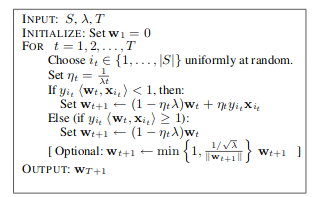

In [53]:
class PegasosSVM():
    """Implementation of SVM with SGD with PEGASOS Algorithm"""
    def __init__(self, iters=10, lamda=1):
        self.iter = iters
        self.lamda = lamda
        self.weight = 0 #Weight initialized
        self.S = 0 #Number of Samples  
        
    def fit(self, X, y):
        self.iter = int(len(X)/10.0)
        self.S = len(X) #Number of Samples
        self.weight = np.zeros(len(X[0]))
        for t in range(1,self.iter+1):
            index = random.randint(0,self.S-1)
            # Get index from 0 to S
            eta = 1.0/(t*self.lamda)
            dot = np.dot(self.weight, X[index])
            w_new =  (1 - eta*self.lamda)*self.weight
            if y[index]*dot < 1:
                w_new += eta*y[index]*X[index]
            w_new = min(1, 1.0/(math.sqrt(self.lamda)*np.linalg.norm(w_new)))*w_new
            self.weight = w_new
        return self.weight
    
    def get_prediction(self, X):
        return np.sign(np.dot(X, self.weight)).astype(int)
    
    def classify(self, X, y):
        count = 0
        for i in range(len(X)):
            if y[i] == np.sign(np.dot(self.weight,X[i])):
                count += 1
        return count/len(X)
    

In [55]:
start=datetime.now()
X_train_1 , y_train_1, X_test_1, y_test_1 = getClasses(X_train, y_train, X_test, y_test,input_size=1)
psvm = PegasosSVM()
psvm.fit(X_train_1, y_train_1)
print('Pegasos Linear Classifier - accuracy', psvm.classify(X_test_1,y_test_1))
print('Time taken', datetime.now()-start)

Pegasos Linear Classifier - accuracy 0.978
Time taken 0:00:00.279533


In [57]:
matrix = confusion_matrix(y_train_1, psvm.get_prediction(X_train_1))
tn, fp, fn, tp = matrix.ravel()
print('Confusion Matrix for Linear SVM')
print(matrix)

Confusion Matrix for Linear SVM
[[5836  164]
 [  74 5926]]


In [58]:
for i in range(0,9):
    for j in range(0,i):
        X_train_1 , y_train_1, X_test_1, y_test_1 = getClasses(X_train, y_train, X_test, y_test,classes=[i,j])
        psvm = PegasosSVM()
        psvm.fit(X_train_1, y_train_1)
        print('Accuracy for Linear Classifier for classes', i, j, 'is', psvm.classify(X_test_1, y_test_1))
        

Accuracy for Linear Classifier for classes 1 0 is 0.9645
Accuracy for Linear Classifier for classes 2 0 is 0.9515
Accuracy for Linear Classifier for classes 2 1 is 0.9765
Accuracy for Linear Classifier for classes 3 0 is 0.8865
Accuracy for Linear Classifier for classes 3 1 is 0.9645
Accuracy for Linear Classifier for classes 3 2 is 0.965
Accuracy for Linear Classifier for classes 4 0 is 0.9685
Accuracy for Linear Classifier for classes 4 1 is 0.9705
Accuracy for Linear Classifier for classes 4 2 is 0.767
Accuracy for Linear Classifier for classes 4 3 is 0.9215
Accuracy for Linear Classifier for classes 5 0 is 0.9925
Accuracy for Linear Classifier for classes 5 1 is 0.994
Accuracy for Linear Classifier for classes 5 2 is 0.9965
Accuracy for Linear Classifier for classes 5 3 is 0.9935
Accuracy for Linear Classifier for classes 5 4 is 0.995
Accuracy for Linear Classifier for classes 6 0 is 0.7945
Accuracy for Linear Classifier for classes 6 1 is 0.963
Accuracy for Linear Classifier for c

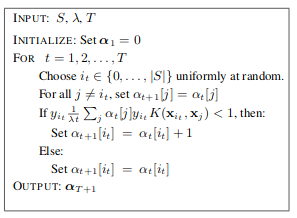

In [60]:
class KernelPegasosSVM():
    """Implementation of SVM with SGD with PEGASOS Algorithm"""
    def __init__(self, iters=10, lamda=1, kernel_type="rbf"):
        self.iter = iters
        self.lamda = lamda
        self.alpha = 0 #Weight initialized
        self.S = 0 #Number of Samples 
        self.weight = 0
        self.kernel_type = kernel_type
        self.X = 0
        
    def kernel_dot(self,point1, point2, gamma=1):
        if self.kernel_type == "rbf":
            diff = point1 - point2
            diff_squared = np.dot(diff,diff)
            return np.exp(-gamma*diff_squared)
        elif self.kernel_type == 'poly':
            dot_prod = np.dot(point1,point2)
            return (dot_prod+1)*(dot_prod+1)
        elif self.kernel_type == 'sigmoid':
            dot_prod = np.dot(point1, point2)
            gamma = 1/len(self.X)
            return np.tanh(gamma*dot_prod)
        
    
    def kernel_func(self,point1):
        pass
    
    def check(self, index, y , X, alpha_new, t):
        out = 0
        prod = y[index]/(self.lamda*t)
        for i in range(self.S):
            if i != index:
                out+= self.alpha[i]*self.kernel_dot(X[index], X[i])*y[i]
        self.alpha_new = alpha_new
        return prod*out
        
    def get_weight(self, X, y):
        factor = self.iter*self.lamda
        self.weight = np.zeros(len(X[0]))
        for i in range(self.S):
            self.weight += self.alpha[i]*y[i]*self.kernel_func(X[i])
        return self.weight
        
    def fit(self, X, y):
        self.iter = int(len(X)/10.0)
        self.S = len(X) #Number of Samples
        self.alpha = np.zeros(self.S)
        self.X = X
        self.y = y
        for t in range(1,self.iter+1):
            index = random.randint(0,self.S-1)
            # Get index from 0 to S
            alpha_new = self.alpha
            alpha_new[index] = 0
            if self.check(index, y, X, alpha_new, t) < 1:
                self.alpha_new[index] += 1
            else:
                self.alpha_new[index] = self.alpha_new[index]
            self.alpha = self.alpha_new
    
    def get_prediction(self, ele):
        factor = self.iter*self.lamda
        self.weight = 0
        for i in range(len(self.X)):
            self.weight += self.alpha[i]*self.y[i]*self.kernel_dot(self.X[i], ele)
        return self.weight
    
    def classify(self, X, y):
        count = 0
        for i in tqdm(range(len(X))):
            if y[i] == np.sign(self.get_prediction(X[i])).astype(int):
                count += 1
        return count/len(X)
    

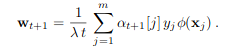


In [61]:
from datetime import datetime
start=datetime.now()
X_train_1 , y_train_1, X_test_1, y_test_1 = getClasses(X_train, y_train, X_test, y_test)
psvm = KernelPegasosSVM()
psvm.fit(X_train_1, y_train_1)

print('Accuracy for RBF SVM',psvm.classify(X_test_1, y_test_1))
print('Time taken', datetime.now()-start)


Accuracy for RBF SVM 0.988
Time taken 0:03:00.981479


In [63]:
start=datetime.now()
X_train_1 , y_train_1, X_test_1, y_test_1 = getClasses(X_train, y_train, X_test, y_test)
psvm = KernelPegasosSVM()
psvm.kernel_type = "poly"
psvm.fit(X_train_1, y_train_1)
print('Accuracy for polynomial SVM, degree 2',psvm.classify(X_test_1, y_test_1))
print('Time taken', datetime.now()-start)


Accuracy for polynomial SVM, degree 2 0.971
Time taken 0:01:41.453164


In [65]:
start=datetime.now()
X_train_1 , y_train_1, X_test_1, y_test_1 = getClasses(X_train, y_train, X_test, y_test)
psvm = KernelPegasosSVM()
psvm.kernel_type = "sigmoid"
psvm.fit(X_train_1, y_train_1)
print('Accuracy for sigmoid  kernel SVM, degree 2',psvm.classify(X_test_1, y_test_1))
print('Time taken', datetime.now()-start)


Accuracy for sigmoid  kernel SVM, degree 2 0.909
Time taken 0:02:34.129210


In [66]:
def multiClassesTrain(X_train, y_train, class_label=1):
    smaller_training_X = []
    smaller_training_Y = []
    for i in range(len((X_train))):
        if y_train[i] == class_label:
            smaller_training_X.append(X_train[i])
            smaller_training_Y.append(1)
        else:
            smaller_training_X.append(X_train[i])
            smaller_training_Y.append(-1)
    return np.array(smaller_training_X), np.array(smaller_training_Y)

def getClassesTrain(X_train, y_train, classes = [1,2]):
    smaller_training_X = []
    smaller_training_Y = []
    for i in range(len((X_train))):
        if y_train[i] in classes:
            smaller_training_X.append(X_train[i])
            smaller_training_Y.append(y_train[i])
    smaller_training_Y = normalize_classes(smaller_training_Y, min(classes), max(classes))
    return np.array(smaller_training_X), np.array(smaller_training_Y)


In [67]:
class multiSVM():
    
    def __init__(self,num_labels=10):
        self.num_labels = num_labels
        self.num_classifiers = num_labels*(num_labels-1)/2
        self.classifier_matrix = [[0 for i in range(num_labels)] for j in range(num_labels)]
    
    def fit(self, X, y): 
        for i in range(0,self.num_labels):
            for j in range(0,i):
                X_train_1 , y_train_1 = getClassesTrain(X,y,classes=[i,j])
                self.classifier_matrix[i][j] = PegasosSVM()
                self.classifier_matrix[i][j].iter = 10000
                self.classifier_matrix[i][j].fit(X_train_1,y_train_1)
    
    def multiClassLabel(self, X, y):
        output_labels = [[0 for i in range(self.num_labels)] for j in range(self.num_labels)]
        for i in range(self.num_labels):
            for j in range(i):
                output_labels[i][j] = self.classifier_matrix[i][j].get_prediction(X)
        
        final_labels = []
        class_count = np.zeros(self.num_labels)
        for index in range(len(X)):
            class_count = np.zeros(self.num_labels)
            for i in range(self.num_labels):
                for j in range(i):
                    if output_labels[i][j][index] == -1:
                        class_count[i] += 1
                    else:
                        class_count[j] += 1
            final_labels.append(np.argmax(class_count))
        
        return final_labels

    def multiClassify(self, X, y):
        y_pred = self.multiClassLabel(X,y)
        count = 0
        for i in range(len(y)):
            if y_pred[i] == y[i]:
                count+=1
        return count/len(y)

In [72]:
mpsvm = multiSVM()
mpsvm.fit(X_train, y_train)
start = datetime.now()
print('Accuracy for multi class SVM Linear Majority Voting',100*mpsvm.multiClassify(X_test, y_test))
print(datetime.now()-start)

Accuracy for multi class SVM Linear Majority Voting 0.03
0:00:00.520345
